In [2]:
import pandas as pd

df = pd.read_csv(r"D:\Carrer\AI\AI Er Learning\ML\Feature Engineering\2) Outlier_Z_Score\data\heights.csv")

df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [3]:
from matplotlib import pyplot as plt

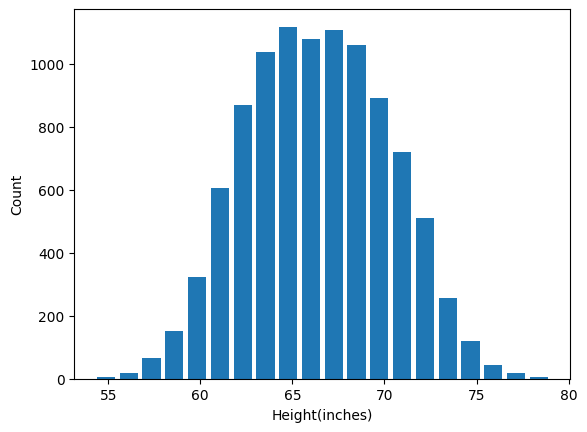

In [4]:
plt.hist(df['height'],bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel('Count')
plt.show()

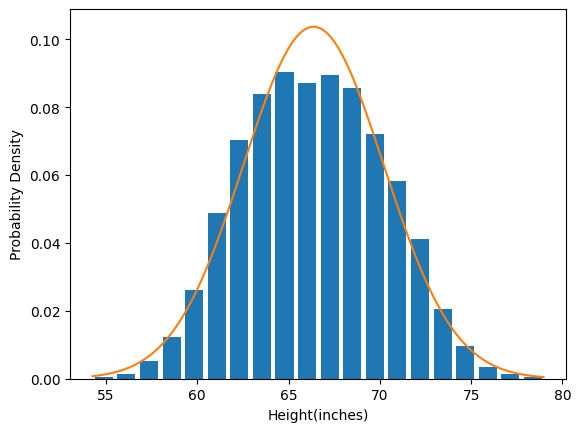

In [5]:
from scipy.stats import norm
import numpy as np

plt.hist(df['height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Probability Density')


rng = np.arange(df['height'].min(),df['height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['height'].mean(),df['height'].std()))

In [6]:
df['height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [7]:
upper_limit = df['height'].mean()+3*df['height'].std()
upper_limit

np.float64(77.91014411725271)

In [8]:
lower_limit = df['height'].mean()-3*df['height'].std()
lower_limit

np.float64(54.824975392479274)

In [9]:
df[(df['height']>upper_limit) | (df['height']<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [10]:
df_no_outlier_std_dev = df[(df['height']<upper_limit) & (df['height']>lower_limit)]

In [11]:
df_no_outlier_std_dev

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [12]:
df['zscore'] = (df['height']-df['height'].mean())/df['height'].std()
df['zscore']

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: zscore, Length: 10000, dtype: float64

In [13]:
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [14]:
df_no_outlier_zscore = df[(df['zscore']<3.0) & (df['zscore']>-3.0)]
df_no_outlier_zscore

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090


In [15]:
df_no_outlier_zscore

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
